## Import and load data 

In [122]:
from keras.datasets import mnist

In [123]:
(x_train, y_train), (x_test, y_test) = mnist.load_data(path='/Users/ngyduong/anaconda3/envs/DeepLearning/lib/python3.7/site-packages/keras/datasets/mnist.npz')

## Import packages

In [124]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os

from keras.models import Sequential, load_model
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils

### Set working directory

In [125]:
os.chdir("/Users/ngyduong/Documents/Machine Learning/Deep Learning/MNIST_Handwritten_Digit_Recognition")

# Visualising the data

## Some informations about the data

In [126]:
print('x_train shape :', x_train.shape)
print('y_train shape :', y_train.shape)
print('x_test shape :', x_test.shape)
print('y_test shape :', y_test.shape)

x_train shape : (60000, 28, 28)
y_train shape : (60000,)
x_test shape : (10000, 28, 28)
y_test shape : (10000,)


Then we have the y_train data set which is only the label for each of the images in the x_train data set.

The same logic applies to the x_test and y_test data sets but with only 10000 observations.

## Plotting the data

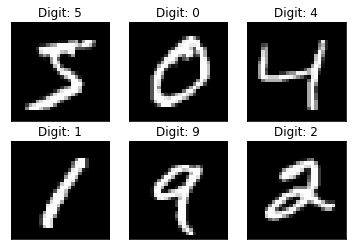

In [127]:
for i in range(6):
    plt.subplot(2,3,i+1) # we create 6 empty subplots 
    plt.imshow(x_train[i], cmap = 'gray') 
    plt.xticks([]) # remove x scales
    plt.yticks([]) # remove y scales
    plt.title("Digit: {}".format(y_train[i])) # Give titles to each subplots  

Text(0.5, 1.0, 'Pixel Value Distribution')

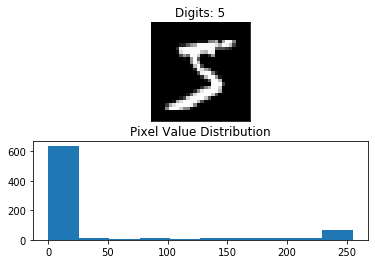

In [128]:
plt.subplot(2,1,1) # create 1st subplot with index 1
plt.imshow(x_train[0], cmap='gray')
plt.title('Digits: {}'.format(y_train[0]))
plt.xticks([])
plt.yticks([])
plt.subplot(2,1,2) # create 2nd subplot with index 1
plt.hist(x_train[0].reshape(784)) # 28x28 = 784 
plt.title('Pixel Value Distribution')

## Transform the data

### Transform x_train and x_test

In [129]:
x_train = x_train.reshape(60000, 784).astype('float32')
x_test = x_test.reshape(10000, 784).astype('float32')

In [130]:
x_train /= max(x_train[0])
x_test /= max(x_test[0])

In [131]:
print('New x_train shape :', x_train.shape)
print('New x_test shape :', x_test.shape)

New x_train shape : (60000, 784)
New x_test shape : (10000, 784)


### Transform y_train and y_test

In [132]:
Y_train = pd.get_dummies(y_train, "digit", "_")
Y_test = pd.get_dummies(y_test, "digit", "_")

In [133]:
print('New Y_train shape :', y_train.shape)
print('New Y_test shape :', y_test.shape)

New Y_train shape : (60000,)
New Y_test shape : (10000,)


## Building the network

In [134]:
model = Sequential()

# First hidden layers of 512 node
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu')) # Rectified Linear Unit : max(x,0)
model.add(Dropout(0.2)) # 20% chance to set an activation node to 0 

# Second hidden layers of 512 node
model.add(Dense(512))
model.add(Activation('relu')) 
model.add(Dropout(0.2))

# Final visible layer with the 10 categorical variables from 0 to 9
model.add(Dense(10)) 
model.add(Activation('softmax')) 

## Training the model

### Compiling the sequential model

In [135]:
model.compile(loss = 'categorical_crossentropy', 
              metrics = ['accuracy'], optimizer = 'adam')

### Fit the model

In [138]:
model_fit = model.fit(x_train, Y_train, 
                      batch_size = 100, # number of samples for one update to the model weights
                      epochs = 10, # number of iteration
                      verbose = 2, validation_data = (x_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 8s - loss: 0.2378 - accuracy: 0.9278 - val_loss: 0.1046 - val_accuracy: 0.9674
Epoch 2/10
 - 8s - loss: 0.0989 - accuracy: 0.9697 - val_loss: 0.0790 - val_accuracy: 0.9752
Epoch 3/10
 - 11s - loss: 0.0721 - accuracy: 0.9777 - val_loss: 0.0783 - val_accuracy: 0.9771
Epoch 4/10
 - 9s - loss: 0.0553 - accuracy: 0.9827 - val_loss: 0.0670 - val_accuracy: 0.9794
Epoch 5/10
 - 9s - loss: 0.0467 - accuracy: 0.9841 - val_loss: 0.0601 - val_accuracy: 0.9823
Epoch 6/10
 - 8s - loss: 0.0395 - accuracy: 0.9871 - val_loss: 0.0672 - val_accuracy: 0.9804
Epoch 7/10
 - 9s - loss: 0.0344 - accuracy: 0.9884 - val_loss: 0.0819 - val_accuracy: 0.9782
Epoch 8/10
 - 9s - loss: 0.0312 - accuracy: 0.9901 - val_loss: 0.0896 - val_accuracy: 0.9770
Epoch 9/10
 - 10s - loss: 0.0294 - accuracy: 0.9900 - val_loss: 0.0826 - val_accuracy: 0.9808
Epoch 10/10
 - 8s - loss: 0.0274 - accuracy: 0.9909 - val_loss: 0.0803 - val_accuracy: 0.9808


### Plotting the metrics

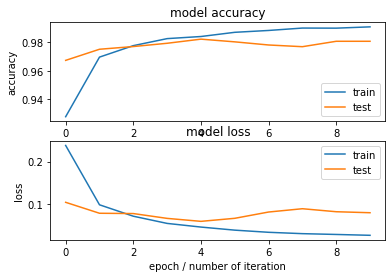

In [139]:
plt.subplot(2,1,1)
plt.plot(model_fit.history['accuracy'])
plt.plot(model_fit.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('epoch / number of iteration')
plt.ylabel('accuracy')
plt.legend(['train','test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(model_fit.history['loss'])
plt.plot(model_fit.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch / number of iteration')
plt.ylabel('loss')
plt.legend(['train','test'], loc='upper right')

### Save the model 

In [140]:
model.save(os.path.join(os.getcwd(),'mnist_model.h5'))

## Evaluate model performance

### Load the model

In [141]:
mnist_model = load_model('mnist_model.h5')

### Get the loss and accuracy

In [143]:
loss_and_metrics = mnist_model.evaluate(x_test, Y_test, 
                                        verbose=2)

print("The test loss is {}".format(loss_and_metrics[0]))
print("The test accuracy is {}".format(loss_and_metrics[1]))

The test loss is 0.08026687926339682
The test accuracy is 0.9807999730110168


### Evaluate the correct and incorrect classification examples

In [144]:
predicted_classes = mnist_model.predict_classes(x_test)

correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

print('classified correctly {}'.format(len(correct_indices)))
print('classified incorrectly {}'.format(len(incorrect_indices)))


classified correctly 9808
classified incorrectly 192


### Plot 9 correct prediction

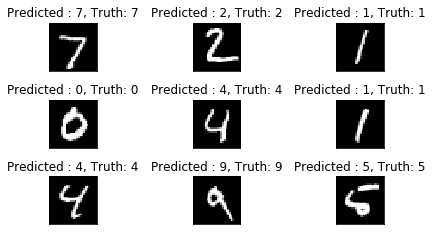

In [145]:
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.subplots_adjust(wspace = 2)
    plt.imshow(x_test[correct].reshape(28,28), cmap = 'gray')
    plt.title("Predicted : {}, Truth: {}".format(predicted_classes[correct],
                                                 y_test[correct]))
    plt.xticks([])
    plt.yticks([])

In [146]:
### Plot 9 incorrect prediction

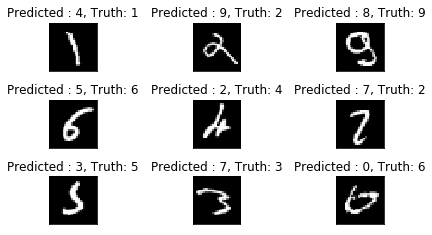

In [147]:
for j, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,j+1)
    plt.subplots_adjust(wspace = 2)
    plt.imshow(x_test[incorrect].reshape(28,28), cmap = 'gray')
    plt.title("Predicted : {}, Truth: {}".format(predicted_classes[incorrect],
                                                 y_test[incorrect]))
    plt.xticks([])
    plt.yticks([])